Decision Tree Accuracy: 0.9415
Default Tree (depth=7): Train Acc=1.0000, Test Acc=0.9415
Controlled Tree (depth=4): Train Acc=0.9950, Test Acc=0.9532
Decision Tree Accuracy (Controlled): 0.9532
Random Forest Accuracy: 0.9708
Top 5 Features:
1. mean concave points: 0.1419
2. worst concave points: 0.1271
3. worst area: 0.1182
4. mean concavity: 0.0806
5. worst radius: 0.0780
Cross-Validation Scores: [0.92105263 0.93859649 0.98245614 0.96491228 0.97345133]
Mean CV Accuracy: 0.9561 (+/- 0.0457)


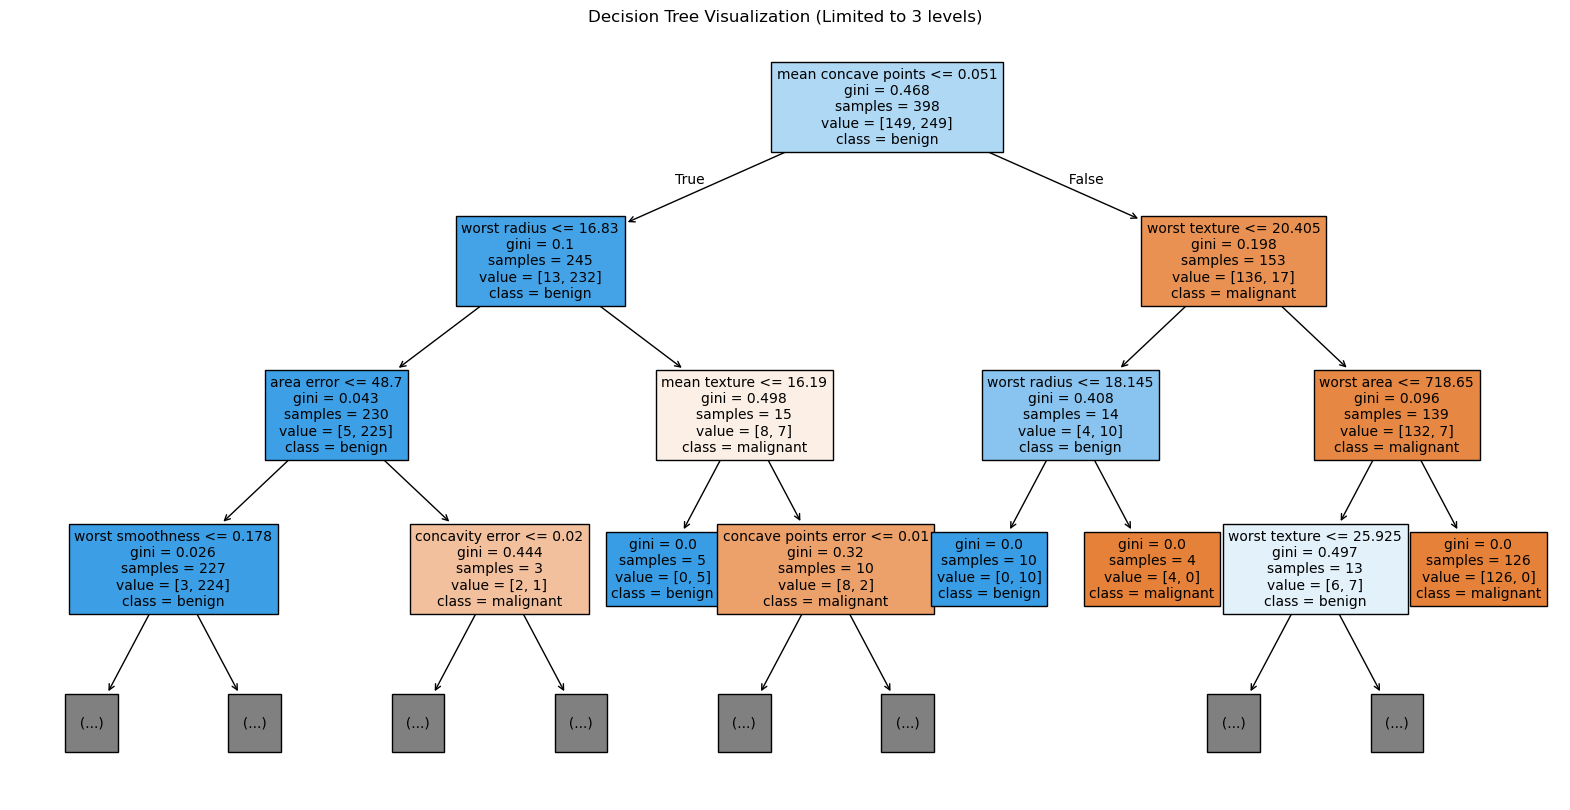

In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names
target_names = data.target_names

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)
y_pred_dt = dt_classifier.predict(X_test)
acc_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {acc_dt:.4f}")

plt.figure(figsize=(20,10))
plot_tree(dt_classifier, 
          filled=True, 
          feature_names=feature_names, 
          class_names=target_names, 
          max_depth=3,
          fontsize=10)
plt.title("Decision Tree Visualization (Limited to 3 levels)")
plt.savefig("decision_tree_visualization.png")

train_acc_overfit = accuracy_score(y_train, dt_classifier.predict(X_train))
test_acc_overfit = accuracy_score(y_test, dt_classifier.predict(X_test))
print(f"Default Tree (depth={dt_classifier.get_depth()}): Train Acc={train_acc_overfit:.4f}, Test Acc={test_acc_overfit:.4f}")

dt_controlled = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_controlled.fit(X_train, y_train)
train_acc_controlled = accuracy_score(y_train, dt_controlled.predict(X_train))
test_acc_controlled = accuracy_score(y_test, dt_controlled.predict(X_test))
print(f"Controlled Tree (depth=4): Train Acc={train_acc_controlled:.4f}, Test Acc={test_acc_controlled:.4f}")

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)

print(f"Decision Tree Accuracy (Controlled): {test_acc_controlled:.4f}")
print(f"Random Forest Accuracy: {acc_rf:.4f}")

importances = rf_classifier.feature_importances_
indices = np.argsort(importances)[::-1]

print("Top 5 Features:")
for i in range(5):
    print(f"{i + 1}. {feature_names[indices[i]]}: {importances[indices[i]]:.4f}")

cv_scores = cross_val_score(rf_classifier, X, y, cv=5)
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")